In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

### Load and Combine the Datasets

In [ ]:
# Load true and fake news datasets
true_news = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/True.csv")
fake_news = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/Fake.csv")

print(f"True News Shape: {true_news.shape}")
print(f"Fake News Shape: {fake_news.shape}")
print(true_news.head())
print(fake_news.head())

True News Shape: (21417, 4)
Fake News Shape: (23481, 4)
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
                                          

In [ ]:
# Add a 'label' column: 0 for fake news, 1 for true news
true_news['label'] = 1
fake_news['label'] = 0

In [ ]:
true_news.shape, fake_news.shape

((21417, 5), (23481, 5))

In [ ]:
true_news_manual_test = true_news.tail(10)
for i in range(21417, 21406, -1):
   true_news.drop(i, axis=0, inplace=True, errors='ignore')

fake_news_manual_test = fake_news.tail(10)
for i in range(23481, 23470, -1):
  fake_news.drop(i, axis=0, inplace=True, errors='ignore')

In [ ]:
true_news.shape, fake_news.shape

((21407, 5), (23471, 5))

In [ ]:
true_news_manual_test['label'] = 1
fake_news_manual_test['label'] = 0

<ipython-input-9-4b570be4364a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_news_manual_test['label'] = 1
<ipython-input-9-4b570be4364a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_manual_test['label'] = 0


In [ ]:
fake_news_manual_test.head()

,title,text,subject,date,label
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [ ]:
true_news_manual_test.head()

,title,text,subject,date,label
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [ ]:
# Combine the datasets
data_merge = pd.concat([true_news, fake_news], axis=0)

In [ ]:
data_merge.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [ ]:
data = data_merge.drop(['subject', 'date', 'title'], axis=1)

In [ ]:
data.isnull().sum()

,0
text,0
label,0


In [ ]:
data = data.sample(frac=1)

In [ ]:
data.head()

,text,label
20952,VIENNA (Reuters) - Austria s far-right Freedom...,1
14949,LONDON (Reuters) - British lawmakers will deba...,1
6663,"As you probably know by now, Republican presid...",0
14800,Jim Comey gets a 10 year tenure as FBI directo...,0
7026,President Obama is clearly in good spirits tha...,0


In [ ]:
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['text', 'label'], dtype='object')

In [ ]:
data.head()

,text,label
0,VIENNA (Reuters) - Austria s far-right Freedom...,1
1,LONDON (Reuters) - British lawmakers will deba...,1
2,"As you probably know by now, Republican presid...",0
3,Jim Comey gets a 10 year tenure as FBI directo...,0
4,President Obama is clearly in good spirits tha...,0


In [ ]:
def wordopt(text):
    # Convert text to lowercase for consistency
    text = text.lower()
    # Remove any characters that are not letters or whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove any isolated single characters
    text = re.sub(r'\b\w\b', '', text)
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    # Remove punctuation
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), '', text)
    # Remove newline characters
    text = re.sub(r'\n', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    return text

In [ ]:
data['text'] = data['text'].apply(wordopt)

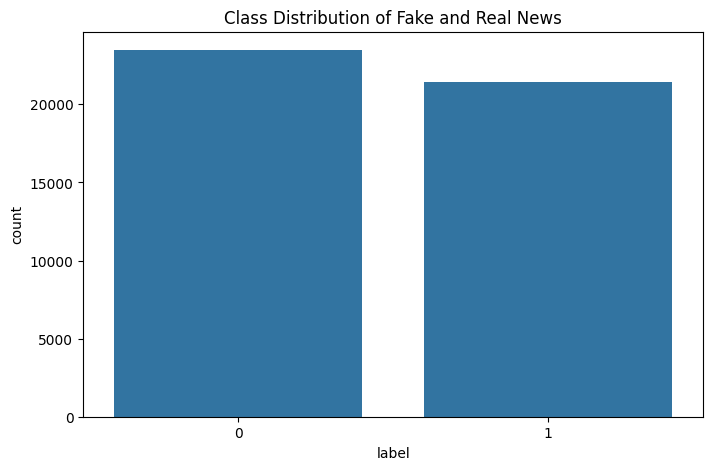

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=data)
plt.title("Class Distribution of Fake and Real News")
plt.show()

In [ ]:
x = data['text']
y = data['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [ ]:
pred_lr = LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9879679144385026

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5934
           1       0.98      0.99      0.99      5286

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9942067736185384

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5934
           1       0.99      0.99      0.99      5286

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
predict_gb = GB.predict(xv_test)

In [ ]:
GB.score(xv_test, y_test)

0.9945632798573975

In [ ]:
print(classification_report(y_test, predict_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5934
           1       0.99      1.00      0.99      5286

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rf = RF.predict(xv_test)

In [ ]:
RF.score(xv_test, y_test)

0.9892156862745098

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5934
           1       0.99      0.99      0.99      5286

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



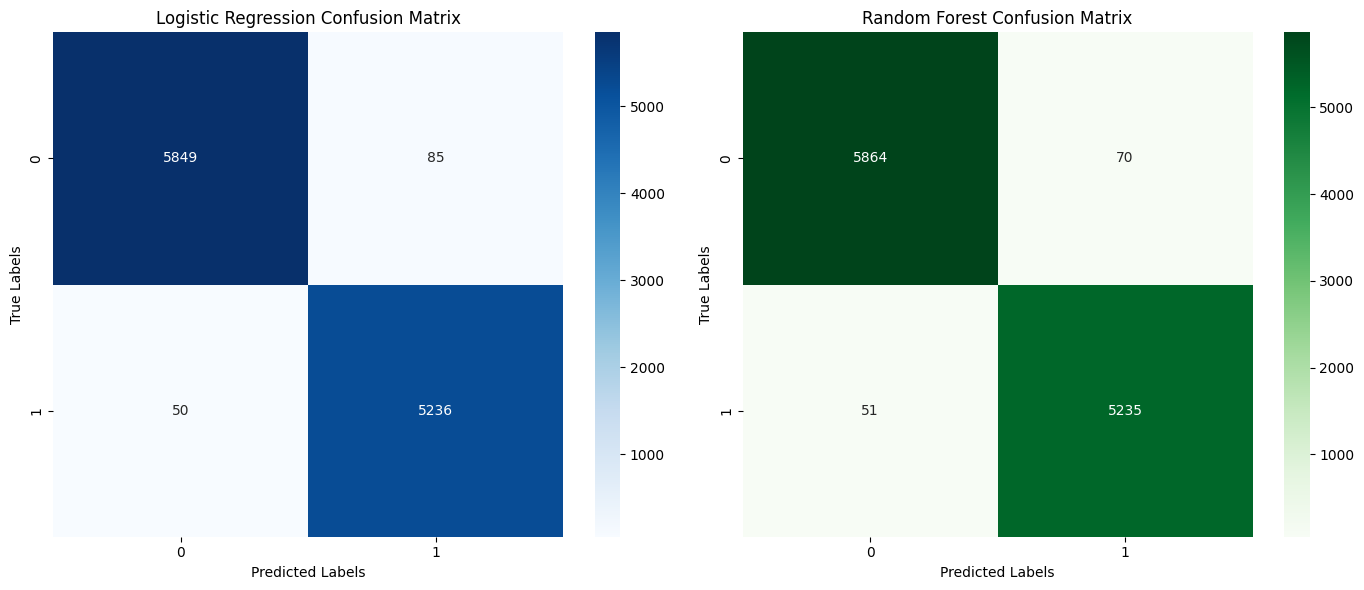

In [ ]:
# Make predictions for Logistic Regression and Random Forest on test data
y_pred_lr = LR.predict(xv_test)
y_pred_rf = RF.predict(xv_test)

# Plot the confusion matrices for both models
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")
ax[0].set_xlabel("Predicted Labels")
ax[0].set_ylabel("True Labels")

# Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("Random Forest Confusion Matrix")
ax[1].set_xlabel("Predicted Labels")
ax[1].set_ylabel("True Labels")

plt.tight_layout()
plt.show()


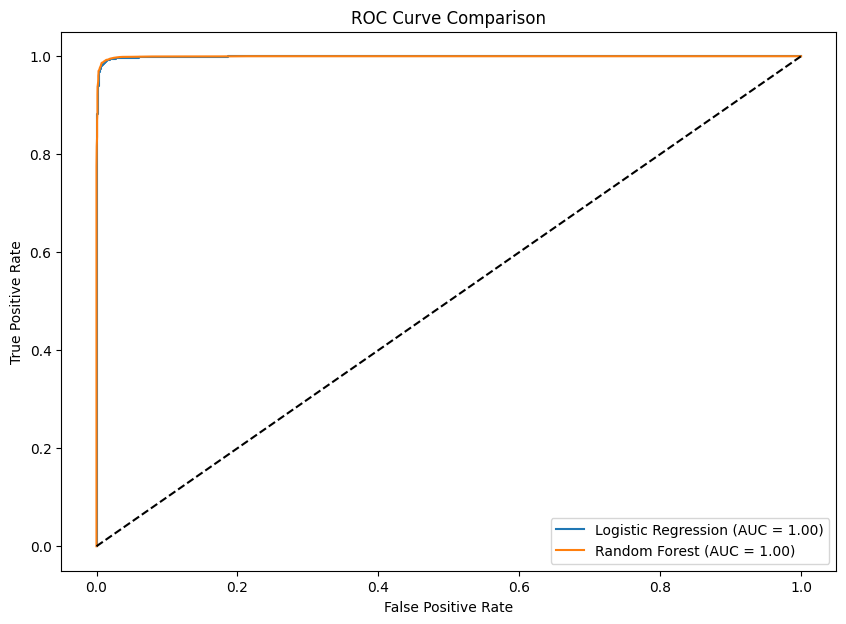

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (1 for "REAL" news in this case)
y_pred_lr_proba = LR.predict_proba(xv_test)[:, 1]
y_pred_rf_proba = RF.predict_proba(xv_test)[:, 1]

# Calculate false positive rates and true positive rates
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr_proba, pos_label=1)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba, pos_label=1)

# Plot ROC Curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_lr_proba)))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_rf_proba)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [ ]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

# Manual testing function
def manual_testing(news):
    # Create a DataFrame with the input news text
    testing_news = {'text': [news]}
    new_def_test = pd.DataFrame(testing_news)

    # Clean the text data using the wordopt function
    new_def_test['text'] = new_def_test['text'].apply(wordopt)

    # Transform text using the vectorizer for model predictions
    new_xv_test = vectorization.transform(new_def_test['text'])

    # Make predictions using each model
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)

    # Print predictions for each model
    return print(
        "\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(
            output_label(pred_LR[0]),
            output_label(pred_DT[0]),
            output_label(pred_GB[0]),
            output_label(pred_RF[0])
        )
    )

In [ ]:
news = str(input("Enter the news: "))
manual_testing(news)

Enter the news: 21st Century Wire says If you ve been following the protest and federal standoff outside of Burns, Oregon, you ll have seen 99% of the news coverage has been about the presence of  armed militia  and endless rumors of FBI  Waco Siege  plots   and not about the core legal issues surrounding the Hammond family.For more in-depth analysis on minimum sentencing laws, jury nullification and property rights, watch the following Liberty Report hosted by Congressman and former presidential candidate Ron Paul is joined by the executive director of the institute for peace and prosperity, Daniel McAdams, along with Jacob Sullum, senior editor from Reason.com  


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News
